In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
dataset = pd.read_csv("train_ctrUa4K.csv")

In [3]:
dataset.shape

(614, 13)

In [4]:
data = dataset.sample(n = 550, random_state = 48)

In [5]:
data.to_csv('MameFasseSALL-2441202_2.csv')

In [6]:
data = pd.read_csv('MameFasseSALL-2441202_2.csv')

In [7]:
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y
2,260,LP001865,Male,Yes,1,Graduate,No,6083,4250.0,330.0,360.0,NaN,Urban,Y
3,171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
4,522,LP002692,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y


In [8]:
data=data.drop('Unnamed: 0', axis = 1)

In [9]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y
2,LP001865,Male,Yes,1,Graduate,No,6083,4250.0,330.0,360.0,NaN,Urban,Y
3,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
4,LP002692,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y


In [10]:
print(data.describe())
print(data.size)
print(data.ndim)
print(data.shape)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       550.000000         550.000000  533.000000        536.000000   
mean       5404.010909        1600.828945  145.195122        340.858209   
std        6294.468909        2998.437210   84.038365         66.035465   
min         150.000000           0.000000    9.000000         12.000000   
25%        2843.000000           0.000000  100.000000        360.000000   
50%        3787.500000        1106.000000  126.000000        360.000000   
75%        5741.000000        2297.250000  165.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      504.000000  
mean         0.839286  
std          0.367632  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
7150
2
(550, 13)


In [11]:
print('dimensions of orignal dataset', dataset.shape)

dimensions of orignal dataset (614, 13)


In [12]:
print('\ndimensions of new dataset', data.shape)


dimensions of new dataset (550, 13)


In [13]:
data['Education'].value_counts()

Education
Graduate        429
Not Graduate    121
Name: count, dtype: int64

In [14]:
columns = data.columns
columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y
2,LP001865,Male,Yes,1,Graduate,No,6083,4250.0,330.0,360.0,NaN,Urban,Y
3,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
4,LP002692,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y


<Axes: >

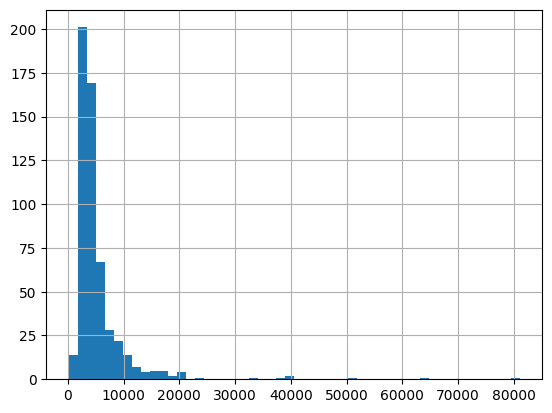

In [16]:
data['ApplicantIncome'].hist(bins=50)

<Axes: >

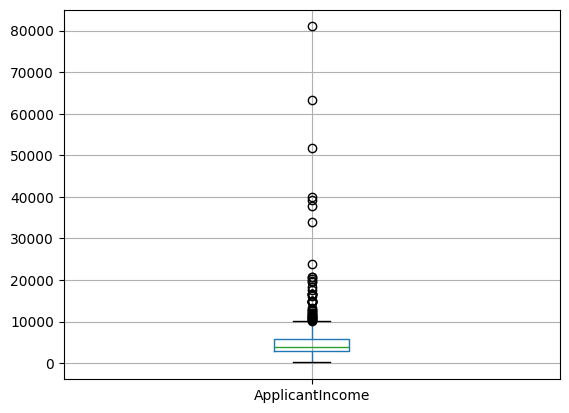

In [17]:
data.boxplot(column='ApplicantIncome')

<Axes: >

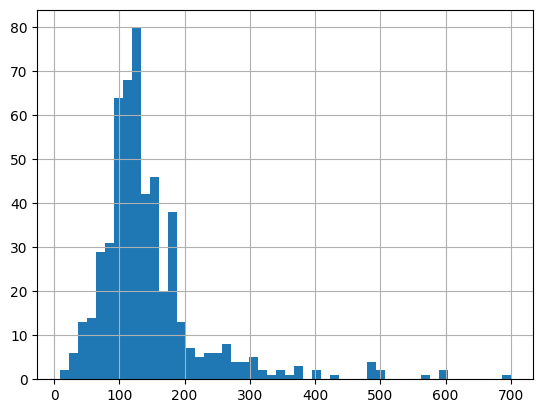

In [18]:
data['LoanAmount'].hist(bins=50)

<Axes: >

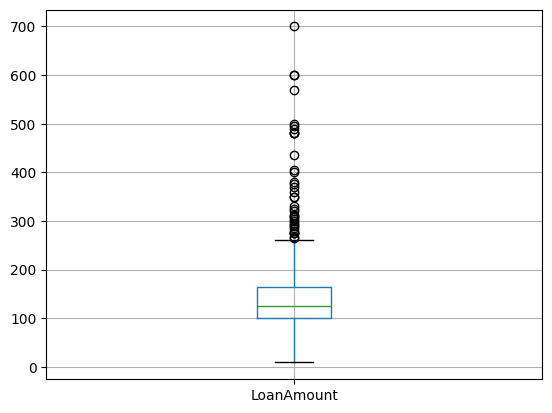

In [19]:
data.boxplot(column='LoanAmount')

In [20]:
data['Credit_History'].value_counts()

Credit_History
1.0    423
0.0     81
Name: count, dtype: int64

In [21]:
credit_history = data['Credit_History'].value_counts(ascending=True)
loan_probability = data.pivot_table(values='Loan_Status', index=['Credit_History'],
aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(credit_history)
print('\nProbability of getting loan for each Credit History class:')
print(loan_probability)

Frequency Table for Credit History:
Credit_History
0.0     81
1.0    423
Name: count, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.074074
1.0                0.782506


In [22]:
data['Loan_Status'].value_counts()

Loan_Status
Y    371
N    179
Name: count, dtype: int64

In [23]:
data.shape

(550, 13)

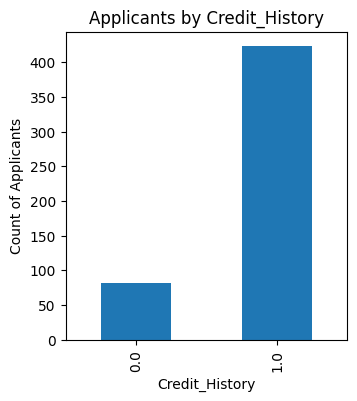

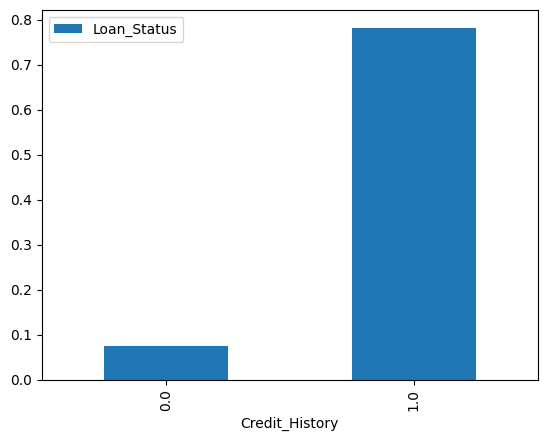

In [24]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
credit_history.plot(kind='bar')
plt.show()
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
loan_probability.plot(kind = 'bar')
plt.show()

In [25]:
data['Gender'].value_counts()

Gender
Male      433
Female    105
Name: count, dtype: int64

In [26]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               12
Married               3
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           17
Loan_Amount_Term     14
Credit_History       46
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace = True)

/var/folders/rq/kzfknmh90z54fgtbmr8hccv40000gn/T/ipykernel_40309/23063535.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace = True)


In [28]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               12
Married               3
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       46
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
data.to_csv('new_train.csv')

<Axes: title={'center': 'LoanAmount'}, xlabel='[Education, Self_Employed]'>

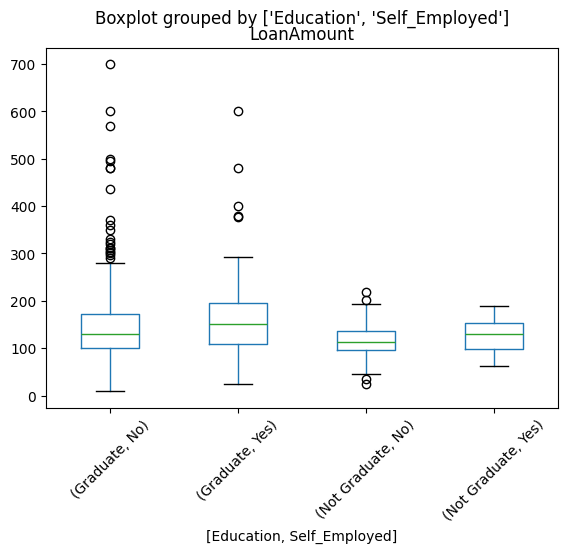

In [30]:
data.boxplot(column='LoanAmount', by = ['Education','Self_Employed'],
grid=False, rot = 45, fontsize = 10)

In [31]:
data['Self_Employed'].value_counts()

Self_Employed
No     453
Yes     70
Name: count, dtype: int64

In [32]:
data['Self_Employed'].fillna('No', inplace=True)

/var/folders/rq/kzfknmh90z54fgtbmr8hccv40000gn/T/ipykernel_40309/12615102.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Self_Employed'].fillna('No', inplace=True)


In [33]:
data['Self_Employed'].value_counts()

Self_Employed
No     480
Yes     70
Name: count, dtype: int64

In [34]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               12
Married               3
Dependents           13
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       46
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,550.000000,550.000000,550.000000,536.000000,504.000000
mean,5404.010909,1600.828945,145.195122,340.858209,0.839286
std,6294.468909,2998.437210,82.726993,66.035465,0.367632
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2843.000000,0.000000,100.000000,360.000000,1.000000
50%,3787.500000,1106.000000,128.000000,360.000000,1.000000
75%,5741.000000,2297.250000,161.500000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


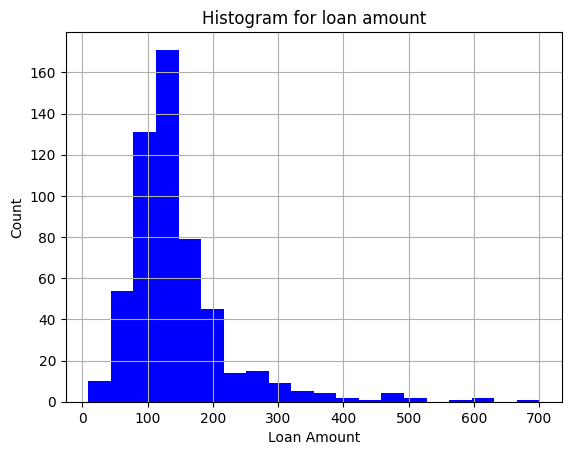

In [36]:
plt.hist(data['LoanAmount'], 20, facecolor='b')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram for loan amount')
plt.grid(True)
plt.show()

<Axes: >

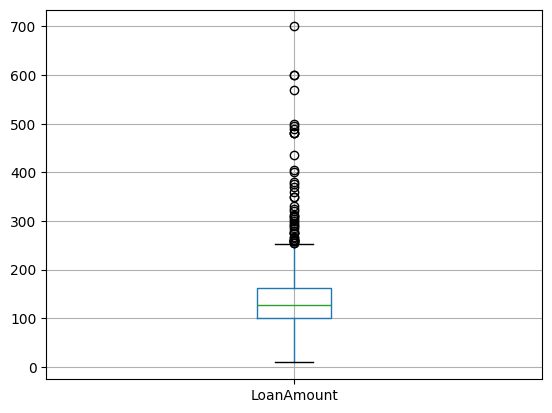

In [37]:
data.boxplot(column='LoanAmount')

In [38]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])

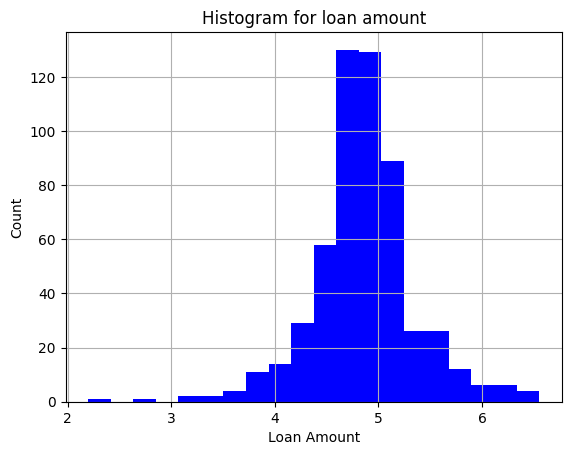

In [39]:
plt.hist(data['LoanAmount_log'], 20, facecolor='b')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram for loan amount')
plt.grid(True)
plt.show()

<Axes: >

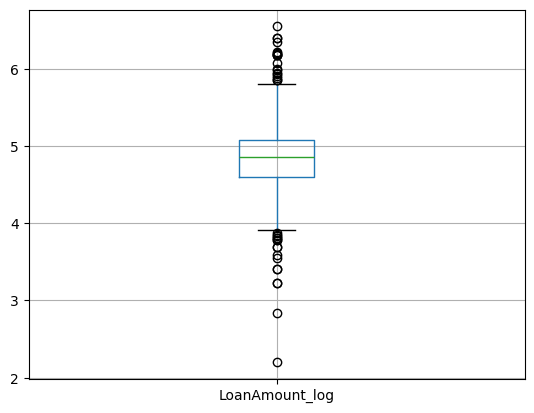

In [40]:
data.boxplot(column='LoanAmount_log')

In [41]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,145.195122,360.0,1.0,Urban,Y,4.978079
1,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.000000,360.0,1.0,Semiurban,Y,3.912023
2,LP001865,Male,Yes,1,Graduate,No,6083,4250.0,330.000000,360.0,NaN,Urban,Y,5.799093
3,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.000000,300.0,1.0,Urban,Y,6.551080
4,LP002692,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.000000,360.0,1.0,Rural,Y,4.605170


In [42]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log
count,550.000000,550.000000,550.000000,536.000000,504.000000,550.000000
mean,5404.010909,1600.828945,145.195122,340.858209,0.839286,4.854892
std,6294.468909,2998.437210,82.726993,66.035465,0.367632,0.494421
min,150.000000,0.000000,9.000000,12.000000,0.000000,2.197225
25%,2843.000000,0.000000,100.000000,360.000000,1.000000,4.605170
50%,3787.500000,1106.000000,128.000000,360.000000,1.000000,4.852030
75%,5741.000000,2297.250000,161.500000,360.000000,1.000000,5.084491
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,6.551080


In [43]:
data = data.drop(['LoanAmount'], axis=1)

In [44]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
#0:gets the mode of each column, 1: for each row
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)

/var/folders/rq/kzfknmh90z54fgtbmr8hccv40000gn/T/ipykernel_40309/883106805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
/var/folders/rq/kzfknmh90z54fgtbmr8hccv40000gn/T/ipykernel_40309/883106805.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [45]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [46]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y,4.978079
1,LP001333,Male,Yes,0,Graduate,No,1977,997.0,360.0,1.0,Semiurban,Y,3.912023
2,LP001865,Male,Yes,1,Graduate,No,6083,4250.0,360.0,1.0,Urban,Y,5.799093
3,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,300.0,1.0,Urban,Y,6.551080
4,LP002692,Male,Yes,3+,Graduate,Yes,5677,1424.0,360.0,1.0,Rural,Y,4.605170


In [47]:
data.shape

(550, 13)

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
columns = list(data)
print(columns)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'LoanAmount_log']


In [50]:
c_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [51]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
dtype: object

In [52]:
le = LabelEncoder()
for i in c_columns: #print(i)
     data[i] = le.fit_transform(data[i])

In [53]:
data.head(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1,0,0,0,0,5849,0.0,360.0,1.0,2,1,4.978079
1,LP001333,1,1,0,0,0,1977,997.0,360.0,1.0,1,1,3.912023
2,LP001865,1,1,1,0,0,6083,4250.0,360.0,1.0,2,1,5.799093
3,LP001585,1,1,3,0,0,51763,0.0,300.0,1.0,2,1,6.551080
4,LP002692,1,1,3,0,1,5677,1424.0,360.0,1.0,0,1,4.605170
5,LP001904,1,1,0,0,0,3103,1300.0,360.0,1.0,2,1,4.382027
6,LP002500,1,1,3,1,0,2947,1664.0,180.0,0.0,2,0,4.248495
7,LP001586,1,1,3,1,0,3522,0.0,180.0,1.0,0,0,4.394449
8,LP001993,0,0,0,0,0,3762,1666.0,360.0,1.0,0,1,4.905275
9,LP002110,1,1,1,0,0,5250,688.0,360.0,1.0,0,1,5.075174


In [54]:
from sklearn.preprocessing import normalize

In [55]:
original_data = data.copy()
original_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1,0,0,0,0,5849,0.0,360.0,1.0,2,1,4.978079
1,LP001333,1,1,0,0,0,1977,997.0,360.0,1.0,1,1,3.912023
2,LP001865,1,1,1,0,0,6083,4250.0,360.0,1.0,2,1,5.799093
3,LP001585,1,1,3,0,0,51763,0.0,300.0,1.0,2,1,6.551080
4,LP002692,1,1,3,0,1,5677,1424.0,360.0,1.0,0,1,4.605170


In [56]:
original_data[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1,0,0,0,0,5849,0.0,360.0,1.0,2,1,4.978079
1,LP001333,1,1,0,0,0,1977,997.0,360.0,1.0,1,1,3.912023
2,LP001865,1,1,1,0,0,6083,4250.0,360.0,1.0,2,1,5.799093
3,LP001585,1,1,3,0,0,51763,0.0,300.0,1.0,2,1,6.551080
4,LP002692,1,1,3,0,1,5677,1424.0,360.0,1.0,0,1,4.605170


In [57]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1,0,0,0,0,5849,0.0,360.0,1.0,2,1,4.978079
1,LP001333,1,1,0,0,0,1977,997.0,360.0,1.0,1,1,3.912023
2,LP001865,1,1,1,0,0,6083,4250.0,360.0,1.0,2,1,5.799093
3,LP001585,1,1,3,0,0,51763,0.0,300.0,1.0,2,1,6.551080
4,LP002692,1,1,3,0,1,5677,1424.0,360.0,1.0,0,1,4.605170


In [58]:
data[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1,0,0,0,0,5849,0.0,360.0,1.0,2,1,4.978079
1,LP001333,1,1,0,0,0,1977,997.0,360.0,1.0,1,1,3.912023
2,LP001865,1,1,1,0,0,6083,4250.0,360.0,1.0,2,1,5.799093
3,LP001585,1,1,3,0,0,51763,0.0,300.0,1.0,2,1,6.551080
4,LP002692,1,1,3,0,1,5677,1424.0,360.0,1.0,0,1,4.605170


In [59]:
data_for_norm = data.drop(['Loan_ID','Loan_Status'], axis=1)

In [60]:
normalized_data = normalize( data_for_norm )

In [61]:
print(normalized_data[0:5])

[[1.70646397e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.98110779e-01 0.00000000e+00 6.14327031e-02
  1.70646397e-04 3.41292795e-04 8.49491163e-04]
 [4.45782377e-04 4.45782377e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.81311759e-01 4.44445030e-01 1.60481656e-01
  4.45782377e-04 4.45782377e-04 1.74391091e-03]
 [1.34601534e-04 1.34601534e-04 1.34601534e-04 0.00000000e+00
  0.00000000e+00 8.18781134e-01 5.72056521e-01 4.84565524e-02
  1.34601534e-04 2.69203069e-04 7.80566769e-04]
 [1.93184938e-05 1.93184938e-05 5.79554814e-05 0.00000000e+00
  0.00000000e+00 9.99983195e-01 0.00000000e+00 5.79554814e-03
  1.93184938e-05 3.86369876e-05 1.26557005e-04]
 [1.70533937e-04 1.70533937e-04 5.11601810e-04 0.00000000e+00
  1.70533937e-04 9.68121158e-01 2.42840326e-01 6.13922172e-02
  1.70533937e-04 0.00000000e+00 7.85337801e-04]]


In [62]:
normalized_data.shape

(550, 11)

In [63]:
data.shape

(550, 13)

In [64]:
normalized_data = pd.DataFrame(normalized_data, columns=data_for_norm.columns)

In [65]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,0.000171,0.000000,0.000000,0.0,0.000000,0.998111,0.000000,0.061433,0.000171,0.000341,0.000849
1,0.000446,0.000446,0.000000,0.0,0.000000,0.881312,0.444445,0.160482,0.000446,0.000446,0.001744
2,0.000135,0.000135,0.000135,0.0,0.000000,0.818781,0.572057,0.048457,0.000135,0.000269,0.000781
3,0.000019,0.000019,0.000058,0.0,0.000000,0.999983,0.000000,0.005796,0.000019,0.000039,0.000127
4,0.000171,0.000171,0.000512,0.0,0.000171,0.968121,0.242840,0.061392,0.000171,0.000000,0.000785


In [66]:
normalized_data['Loan_ID'] = data['Loan_ID']

In [67]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_ID
0,0.000171,0.000000,0.000000,0.0,0.000000,0.998111,0.000000,0.061433,0.000171,0.000341,0.000849,LP001002
1,0.000446,0.000446,0.000000,0.0,0.000000,0.881312,0.444445,0.160482,0.000446,0.000446,0.001744,LP001333
2,0.000135,0.000135,0.000135,0.0,0.000000,0.818781,0.572057,0.048457,0.000135,0.000269,0.000781,LP001865
3,0.000019,0.000019,0.000058,0.0,0.000000,0.999983,0.000000,0.005796,0.000019,0.000039,0.000127,LP001585
4,0.000171,0.000171,0.000512,0.0,0.000171,0.968121,0.242840,0.061392,0.000171,0.000000,0.000785,LP002692


In [68]:
normalized_data['Loan_Status'] = data['Loan_Status']

In [69]:
normalized_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_ID,Loan_Status
0,0.000171,0.000000,0.000000,0.000000,0.000000,0.998111,0.000000,0.061433,0.000171,0.000341,0.000849,LP001002,1
1,0.000446,0.000446,0.000000,0.000000,0.000000,0.881312,0.444445,0.160482,0.000446,0.000446,0.001744,LP001333,1
2,0.000135,0.000135,0.000135,0.000000,0.000000,0.818781,0.572057,0.048457,0.000135,0.000269,0.000781,LP001865,1
3,0.000019,0.000019,0.000058,0.000000,0.000000,0.999983,0.000000,0.005796,0.000019,0.000039,0.000127,LP001585,1
4,0.000171,0.000171,0.000512,0.000000,0.000171,0.968121,0.242840,0.061392,0.000171,0.000000,0.000785,LP002692,1
5,0.000296,0.000296,0.000000,0.000000,0.000000,0.917091,0.384215,0.106398,0.000296,0.000591,0.001295,LP001904,1
6,0.000295,0.000295,0.000885,0.000295,0.000000,0.869547,0.490983,0.053111,0.000000,0.000590,0.001254,LP002500,0
7,0.000284,0.000284,0.000851,0.000284,0.000000,0.998695,0.000000,0.051041,0.000284,0.000000,0.001246,LP001586,0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.910871,0.403379,0.087165,0.000242,0.000000,0.001188,LP001993,1
9,0.000188,0.000188,0.000188,0.000000,0.000000,0.989238,0.129637,0.067833,0.000188,0.000000,0.000956,LP002110,1


In [70]:
normalized_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_Status
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,0.000180,0.000146,0.000165,0.000060,0.000023,0.879347,0.302389,0.078830,0.000194,0.000246,0.001083,0.674545
std,0.000125,0.000133,0.000253,0.000121,0.000070,0.168500,0.315267,0.039279,0.000124,0.000236,0.000429,0.468971
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.009983,0.000000,0.002207,0.000000,0.000000,0.000073,0.000000
25%,0.000084,0.000000,0.000000,0.000000,0.000000,0.797390,0.000000,0.049333,0.000105,0.000000,0.000809,0.000000
50%,0.000190,0.000151,0.000000,0.000000,0.000000,0.970172,0.224797,0.077013,0.000207,0.000220,0.001081,1.000000
75%,0.000267,0.000250,0.000286,0.000000,0.000000,0.997144,0.591792,0.104187,0.000281,0.000372,0.001354,1.000000
max,0.000673,0.000589,0.001609,0.000673,0.000455,0.999996,0.999941,0.242218,0.000673,0.001346,0.002669,1.000000


<Axes: >

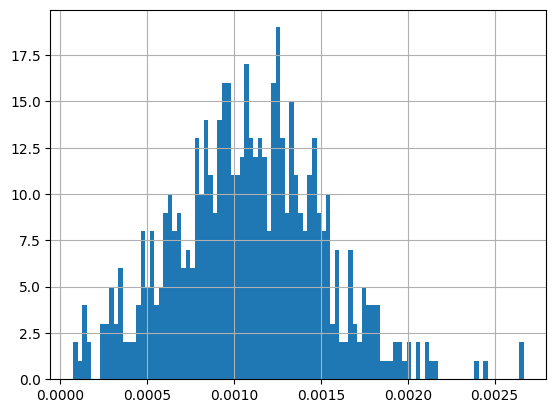

In [71]:
normalized_data['LoanAmount_log'].hist(bins=100)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.metrics import ConfusionMatrixDisplay
import pydotplus

In [74]:
columns = list(normalized_data.columns)
columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'LoanAmount_log',
 'Loan_ID',
 'Loan_Status']

In [75]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_ID,Loan_Status
0,0.000171,0.000000,0.000000,0.0,0.000000,0.998111,0.000000,0.061433,0.000171,0.000341,0.000849,LP001002,1
1,0.000446,0.000446,0.000000,0.0,0.000000,0.881312,0.444445,0.160482,0.000446,0.000446,0.001744,LP001333,1
2,0.000135,0.000135,0.000135,0.0,0.000000,0.818781,0.572057,0.048457,0.000135,0.000269,0.000781,LP001865,1
3,0.000019,0.000019,0.000058,0.0,0.000000,0.999983,0.000000,0.005796,0.000019,0.000039,0.000127,LP001585,1
4,0.000171,0.000171,0.000512,0.0,0.000171,0.968121,0.242840,0.061392,0.000171,0.000000,0.000785,LP002692,1


In [76]:
features = normalized_data.drop(['Loan_ID','Loan_Status'], axis = 1)
classes = pd.DataFrame(normalized_data['Loan_Status'])

In [77]:
print('Features:')
print(features.head())
print('Classes:')
print(classes.head())

Features:
     Gender   Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0  0.000171  0.000000    0.000000        0.0       0.000000         0.998111   
1  0.000446  0.000446    0.000000        0.0       0.000000         0.881312   
2  0.000135  0.000135    0.000135        0.0       0.000000         0.818781   
3  0.000019  0.000019    0.000058        0.0       0.000000         0.999983   
4  0.000171  0.000171    0.000512        0.0       0.000171         0.968121   

   CoapplicantIncome  Loan_Amount_Term  Credit_History  Property_Area  \
0           0.000000          0.061433        0.000171       0.000341   
1           0.444445          0.160482        0.000446       0.000446   
2           0.572057          0.048457        0.000135       0.000269   
3           0.000000          0.005796        0.000019       0.000039   
4           0.242840          0.061392        0.000171       0.000000   

   LoanAmount_log  
0        0.000849  
1        0.001744  
2        0

In [78]:
normalized_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_ID,Loan_Status
0,0.000171,0.000000,0.000000,0.000000,0.000000,0.998111,0.000000,0.061433,0.000171,0.000341,0.000849,LP001002,1
1,0.000446,0.000446,0.000000,0.000000,0.000000,0.881312,0.444445,0.160482,0.000446,0.000446,0.001744,LP001333,1
2,0.000135,0.000135,0.000135,0.000000,0.000000,0.818781,0.572057,0.048457,0.000135,0.000269,0.000781,LP001865,1
3,0.000019,0.000019,0.000058,0.000000,0.000000,0.999983,0.000000,0.005796,0.000019,0.000039,0.000127,LP001585,1
4,0.000171,0.000171,0.000512,0.000000,0.000171,0.968121,0.242840,0.061392,0.000171,0.000000,0.000785,LP002692,1
5,0.000296,0.000296,0.000000,0.000000,0.000000,0.917091,0.384215,0.106398,0.000296,0.000591,0.001295,LP001904,1
6,0.000295,0.000295,0.000885,0.000295,0.000000,0.869547,0.490983,0.053111,0.000000,0.000590,0.001254,LP002500,0
7,0.000284,0.000284,0.000851,0.000284,0.000000,0.998695,0.000000,0.051041,0.000284,0.000000,0.001246,LP001586,0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.910871,0.403379,0.087165,0.000242,0.000000,0.001188,LP001993,1
9,0.000188,0.000188,0.000188,0.000000,0.000000,0.989238,0.129637,0.067833,0.000188,0.000000,0.000956,LP002110,1


In [79]:
normalized_data.shape

(550, 13)

In [80]:
from matplotlib import pyplot

In [81]:
x_train, x_test, y_train, y_test = train_test_split(features, classes, test_size= .33, random_state = 1)
print(x_train.shape, x_test.shape)

(368, 11) (182, 11)


In [82]:
decisionTree = DecisionTreeClassifier(criterion='entropy')
print(decisionTree)

DecisionTreeClassifier(criterion='entropy')


In [85]:
dtc_model = decisionTree.fit(x_train, y_train)

Feature: 0, Score: 0.07190
Feature: 1, Score: 0.09279
Feature: 2, Score: 0.06191
Feature: 3, Score: 0.01349
Feature: 4, Score: 0.02104
Feature: 5, Score: 0.16876
Feature: 6, Score: 0.03139
Feature: 7, Score: 0.09269
Feature: 8, Score: 0.25913
Feature: 9, Score: 0.09220
Feature: 10, Score: 0.09470


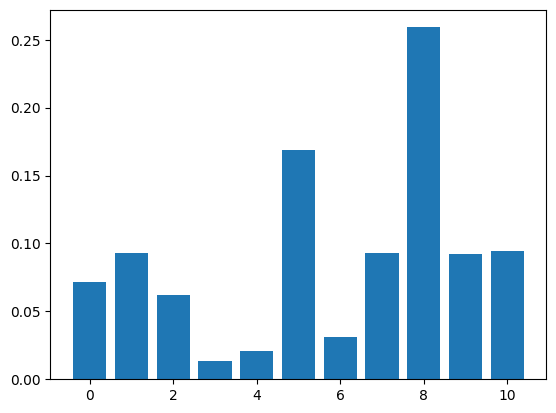

In [86]:
# feature importance
importance = dtc_model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Barchat for feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [87]:
prediction = dtc_model.predict(x_test)

In [88]:
y_true = le.inverse_transform(y_test["Loan_Status"])
y_pred = le.inverse_transform(prediction)

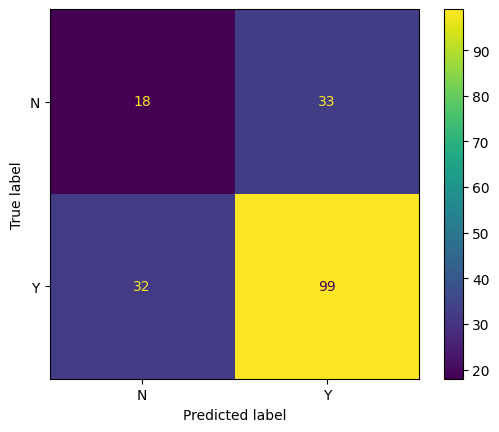

In [89]:
cm = confusion_matrix(y_true, y_pred)
labels = ['N', 'Y']
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [90]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           N       0.36      0.35      0.36        51
           Y       0.75      0.76      0.75       131

    accuracy                           0.64       182
   macro avg       0.55      0.55      0.55       182
weighted avg       0.64      0.64      0.64       182



In [ ]:
graphviz_path = 'C:\Program Files\GTK3-Runtime Win64\bin'

In [ ]:
import os
os.environ["PATH"] += os.pathsep + graphviz_path

In [ ]:
from graphviz import Source
from sklearn import tree
graph = Source( tree.export_graphviz(dtc_model, out_file=None, feature_names=features.columns))

In [ ]:
datafornewmodel = normalized_data

In [ ]:
features1 = datafornewmodel.drop(['Loan_ID','Education','Self_Employed','CoapplicantIncome','Loan_Status'], axis = 1)
classes1 = pd.DataFrame(normalized_data['Loan_Status'])

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(features1, classes1, test_size= .2, random_state = 1)
print(x_train1.shape, x_test1.shape)

In [ ]:
decisionTree1 = DecisionTreeClassifier(criterion='entropy')
print(decisionTree1)

In [ ]:
dtc_model1 = decisionTree.fit(x_train1, y_train1)

In [ ]:
# feature importance
importance = dtc_model1.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Barchat for feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
prediction1 = dtc_model1.predict(x_test1)

In [ ]:
y_true1 = le.inverse_transform(y_test1["Loan_Status"])
y_pred1 = le.inverse_transform(prediction1)

In [ ]:
cm1 = confusion_matrix(y_true1, y_pred1)
labels1 = ['N', 'Y']
ConfusionMatrixDisplay(cm1, display_labels=labels1).plot()

In [ ]:
print(classification_report(y_true1, y_pred1))